In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Desktop\DataFolder\Global_Superstore2.csv")#, sep=',')
furniture = df.loc[df['Category'] == 'Furniture']

In [3]:
# df

In [4]:
# furniture

In [5]:
furniture['Order Date'].min(), furniture['Order Date'].max()

('01-01-2011', '31-12-2014')

In [6]:
cols = ['Row ID','Order Priority', 'Market','Shipping Cost','Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [7]:
furniture['Order Date'] = furniture['Order Date'].astype('datetime64')

In [8]:
furniture = furniture.groupby('Order Date').agg(sum).reset_index()
furniture

,Order Date,Sales
0,2011-01-01,113.6700
1,2011-01-02,600.2660
2,2011-01-03,5158.1840
3,2011-01-04,655.3200
4,2011-01-06,4788.0037
...,...,...
1328,2014-12-27,2815.0026
1329,2014-12-28,224.7000
1330,2014-12-29,9109.4028
1331,2014-12-30,9210.8869


In [9]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-06', '2011-01-07', '2011-01-08', '2011-01-09',
               '2011-01-11', '2011-01-12',
               ...
               '2014-12-22', '2014-12-23', '2014-12-24', '2014-12-25',
               '2014-12-26', '2014-12-27', '2014-12-28', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=1333, freq=None)

In [10]:
# furniture

In [11]:
y1 = furniture.resample('M').mean()
# y1

In [12]:
y = furniture['Sales'].resample('MS').mean()

In [13]:
# y

In [14]:
y['2014':]

Order Date
2014-01-01    2792.452417
2014-02-01    3436.709868
2014-03-01    4282.522344
2014-04-01    3131.717020
2014-05-01    3238.189097
2014-06-01    4328.532386
2014-07-01    3043.407403
2014-08-01    4391.556296
2014-09-01    5259.435654
2014-10-01    4029.520086
2014-11-01    5479.135247
2014-12-01    4911.226134
Freq: MS, Name: Sales, dtype: float64

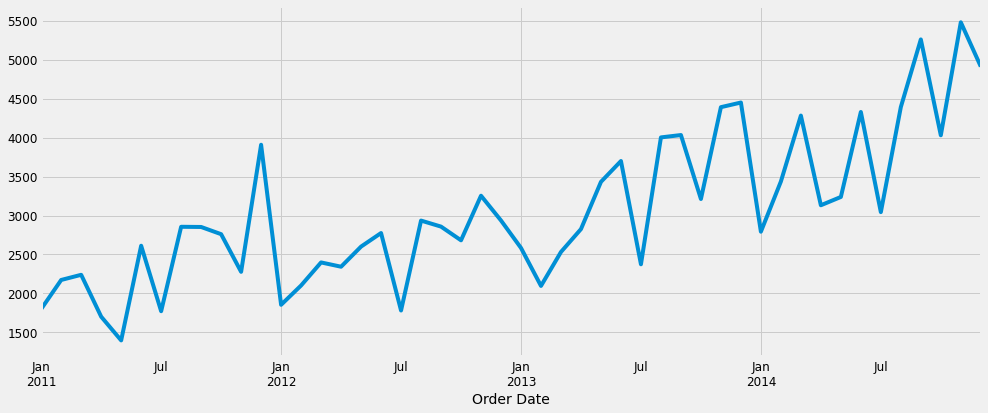

In [15]:
y.plot(figsize=(15, 6))
plt.show()

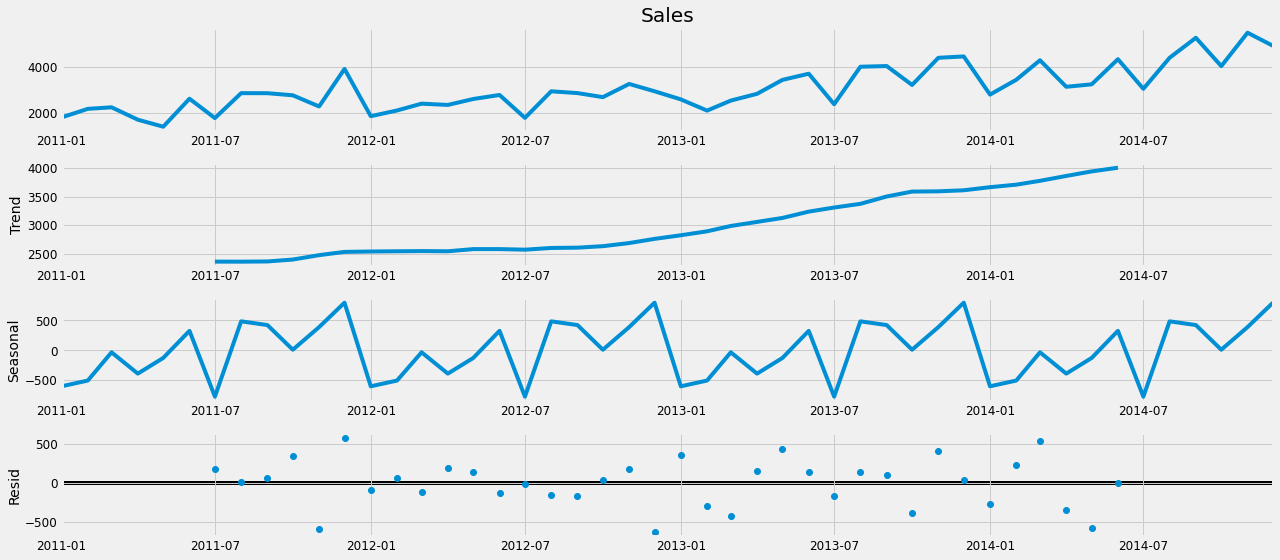

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [17]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [18]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [19]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:894.9584063653595


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1535.0100878262192
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:569.3790067651388
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:379.2218707527037
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:564.785399917399
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:542.6453760075096
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:392.5395266120254
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:367.712013820635
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:834.5527690060657
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2915.2848467353842
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:548.2043958656086
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:356.1343512127339
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:566.7443386616442
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:524.64198211003
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:391.4529341656029
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:352.4966758151537
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:756.7744524807023


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1059.0661270190712
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:548.7641925869115
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:348.99787372149393
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:560.2714009335451


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1605.911864186361
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:365.11135318072473
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:350.6907520112671
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:721.4094339157745


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2492.90819944343
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:516.2562769894593
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:328.02502159335404
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:545.565047980259


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1687.7986497317625
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:357.53986219645964
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:328.73163461928345
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:774.1911421822588


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1585.7829909054126
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:557.5713539198099
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:364.78953282235926
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:551.8406131821863
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:540.1568530734285
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:364.70350955764593
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:366.20180997314077
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:729.859331126456


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1096.3004166597484
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:534.1739096929819
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:344.4348739086427
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:542.523441270218
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:533.4730214939184
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:356.4662200378073
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:343.7894621350792
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:744.7207239776546
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1369.7798068585644
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:540.5433247590241
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:347.9856042457777
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:538.2796375192147


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1174.551955635538
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:348.7239889178653
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:348.8730319591938
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:722.183467206205


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1847.7506507158387
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:517.9741768188865
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:330.0018613404741
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:530.9774989614453


C:\Users\Dell\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:545.8007671811464
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:342.950870288299
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:330.3017254966371


In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3808      0.197     -1.935      0.053      -0.767       0.005
ar.S.L12       0.3098      0.223      1.387      0.166      -0.128       0.748
ma.S.L12      -0.9742      0.534     -1.823      0.068      -2.022       0.073
sigma2      2.317e+05   2.41e-06   9.61e+10      0.000    2.32e+05    2.32e+05


In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

ValueError: Length of endogenous variable must be larger the the number of lags used in the model and the number of observations burned in the log-likelihood calculation.

<Figure size 1152x576 with 0 Axes>

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2014-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

In [ ]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

In [ ]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()


In [ ]:
furniture['Order Date'] = furniture['Order Date'].astype('datetime64')
office['Order Date'] = office['Order Date'].astype('datetime64')

In [ ]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [ ]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

In [ ]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

In [ ]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

In [ ]:
store

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [ ]:
first_date = store.index[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']
print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))